In [ ]:
import pandas as pd
import itertools
import re

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from lightgbm import LGBMClassifier
import os
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/ISAA_DATA/malicious_phish.csv"
path2="/content/drive/MyDrive/ISAA_DATA/WC_sample.csv"
df = pd.read_csv(path)
df1 = pd.read_csv(path2)

In [ ]:
def Find(string):
 
   
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex, string)
    return [x[0] for x in url]

# def has_link(string):
#     regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
#     return bool(re.findall(regex, string))

# string = 'My Profile: quickfacts.census.gov/qfd/maps/iowa_map.html in the portal of https://www.geeksforgeeks.org/'
# print("Urls: ", has_link(string))


In [ ]:

print(df.shape)
df.head()

(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
import re

In [ ]:
pip install tld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 KB 5.7 MB/s eta 0:00:00


In [ ]:
import tld

In [ ]:

#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))
from urllib.parse import urlparse
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))
#pip install googlesearch-python
from googlesearch import search
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))
def count_dot(url):
    count_dot = url.count('.')
    return count_dot
df['count.'] = df['url'].apply(lambda i: count_dot(i))
def count_www(url):
    url.count('www')
    return url.count('www')
df['count-www'] = df['url'].apply(lambda i: count_www(i))
def count_atrate(url):
     
    return url.count('@')
df['count@'] = df['url'].apply(lambda i: count_atrate(i))
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))
def count_https(url):
    return url.count('https')
df['count-https'] = df['url'].apply(lambda i : count_https(i))
def count_http(url):
    return url.count('http')
df['count-http'] = df['url'].apply(lambda i : count_http(i))
def count_per(url):
    return url.count('%')
df['count%'] = df['url'].apply(lambda i : count_per(i))
def count_ques(url):
    return url.count('?')
df['count?'] = df['url'].apply(lambda i: count_ques(i))
def count_hyphen(url):
    return url.count('-')
df['count-'] = df['url'].apply(lambda i: count_hyphen(i))
def count_equal(url):
    return url.count('=')
df['count='] = df['url'].apply(lambda i: count_equal(i))
def url_length(url):
    return len(str(url))
#Length of URL
df['url_length'] = df['url'].apply(lambda i: url_length(i))
#Hostname Length
def hostname_length(url):
    return len(urlparse(url).netloc)
df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))
df.head()
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))
# 
from urllib.parse import urlparse
from tld import get_tld
import os.path
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
df['fd_length'] = df['url'].apply(lambda i: fd_length(i))
#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [ ]:
df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,...,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters,fd_length,tld,tld_length
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,1,0,16,0,0,0,13,0,None,-1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,35,0,0,1,29,5,None,-1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,31,0,0,1,25,7,None,-1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,...,1,4,88,21,0,7,63,9,be,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,...,1,3,235,23,0,22,199,9,net,3


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])

In [ ]:
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]
#Target Variable
y = df['type_code']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=5)
LGB_C = lgb.fit(X_train, y_train)
y_pred_lgb = LGB_C.predict(X_test)
print(classification_report(y_test,y_pred_lgb,target_names=['benign', 'defacement','phishing','malware']))
score = metrics.accuracy_score(y_test, y_pred_lgb)
print("accuracy:   %0.3f" % score)

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.96      0.99      0.98     19292
    phishing       0.97      0.90      0.93      6504
     malware       0.90      0.83      0.86     18822

    accuracy                           0.96    130239
   macro avg       0.95      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130239

accuracy:   0.959


In [ ]:
def main(url):
    
    status = []
    
    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))
    
    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))
    
    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))
    
    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)
      
    status.append(tld_length(tld))
    
    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    
    features_test = np.array(features_test).reshape((1, -1))
    pred = lgb.predict(features_test)
    if int(pred[0]) == 0:
        
        res="SAFE"
        return res
    elif int(pred[0]) == 1.0:
        
        res="DEFACEMENT"
        return res
    elif int(pred[0]) == 2.0:
        res="PHISHING"
        return res
        
    elif int(pred[0]) == 3.0:
        
        res="MALWARE"
        return res

In [ ]:
urls = ['titaniumcorporate.co.za','en.wikipedia.org/wiki/North_Dakota']
for url in urls:
     print(get_prediction_from_url(url))

MALWARE
SAFE


In [ ]:
df1.head()

,"7/26/21, 09:22 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.",have_l,link,nature_prediction
0,"7/26/21, 09:22 - Snigdha Singh: Sunno yaar AO...",0,None,0
1,Praveen T,0,None,0
2,Deep Shakti,0,None,0
3,Ek baar kisi senior se puch kar batao na kauns...,0,None,0
4,"7/26/21, 12:00 - Snigdha Singh: Aur haa Abi pa...",0,None,0


In [ ]:
df1.describe

<bound method NDFrame.describe of      7/26/21, 09:22 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.  \
0     7/26/21, 09:22 - Snigdha Singh: Sunno yaar  AO...                                                                                                             
1                                             Praveen T                                                                                                             
2                                           Deep Shakti                                                                                                             
3     Ek baar kisi senior se puch kar batao na kauns...                                                                                                             
4     7/26/21, 12:00 - Snigdha Singh: Aur haa Abi pa...                                                                                      

In [ ]:
df1["have_l"] = 0

In [ ]:
df1['link'] = df1.iloc[:, 0].apply(lambda x: re.findall(r'(https?://\S+)', str(x))[0] if re.findall(r'(https?://\S+)', str(x)) else None)

In [ ]:
df1.head()

,"7/26/21, 09:22 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.",have_l,link,nature_prediction
0,"7/26/21, 09:22 - Snigdha Singh: Sunno yaar AO...",0,None,0
1,Praveen T,0,None,0
2,Deep Shakti,0,None,0
3,Ek baar kisi senior se puch kar batao na kauns...,0,None,0
4,"7/26/21, 12:00 - Snigdha Singh: Aur haa Abi pa...",0,None,0


In [ ]:
df1['nature_prediction'] = None
for index, row in df1.iterrows():
    if row['link'] is None:
        continue
    array = []
    for url in row['link']:
        prediction = get_prediction_from_url(url)
        array.append(prediction)
    df1.at[index, 'nature_prediction'] = array


In [ ]:
df1['nature_prediction']

0       None
1       None
2       None
3       None
4       None
        ... 
5855    None
5856    None
5857    None
5858    None
5859    None
Name: nature_prediction, Length: 5860, dtype: object

In [ ]:
df1.dropna(subset=['nature_prediction'], inplace=True)

In [ ]:
df1.head()

,"7/26/21, 09:22 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.",have_l,link,nature_prediction
351,"8/1/21, 16:49 - Snigdha Singh: https://www.hea...",0,https://www.healthbit.com/use-cases/caring-for...,"[MALWARE, MALWARE, MALWARE, MALWARE, MALWARE, ..."
607,"8/7/21, 21:06 - Snigdha Singh: https://youtu.b...",0,https://youtu.be/TpnJ4V8TkRk,"[MALWARE, MALWARE, MALWARE, MALWARE, MALWARE, ..."
708,"8/15/21, 20:16 - Snigdha Singh: https://youtu....",0,https://youtu.be/npdKtvKnuZs,"[MALWARE, MALWARE, MALWARE, MALWARE, MALWARE, ..."
809,"8/19/21, 09:51 - Snigdha Singh: https://www.fr...",0,https://www.frontendmentor.io/solutions/reactj...,"[MALWARE, MALWARE, MALWARE, MALWARE, MALWARE, ..."
810,"8/19/21, 09:52 - Snigdha Singh: https://youtu....",0,https://youtu.be/Zj3r0pe5Cw0,"[MALWARE, MALWARE, MALWARE, MALWARE, MALWARE, ..."


In [ ]:
def count_categories(array):
    safe_count = array.count('SAFE')
    defacement_count = array.count('DEFACEMENT')
    malware_count = array.count('MALWARE')
    phishing_count = array.count('PHISHING')
    return [safe_count, defacement_count, malware_count, phishing_count]

category_counts = df1['nature_prediction'].apply(count_categories)
category_counts_df = pd.DataFrame(category_counts.tolist(), columns=['SAFE_count', 'DEFACEMENT_count', 'MALWARE_count', 'PHISHING_count'])
df2 = pd.concat([df1, category_counts_df], axis=1)



In [ ]:
df1.head()

,"7/26/21, 09:22 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.",have_l,link,nature_prediction
351,"8/1/21, 16:49 - Snigdha Singh: https://www.hea...",0,https://www.healthbit.com/use-cases/caring-for...,"[MALWARE, MALWARE, MALWARE, MALWARE, MALWARE, ..."
607,"8/7/21, 21:06 - Snigdha Singh: https://youtu.b...",0,https://youtu.be/TpnJ4V8TkRk,"[MALWARE, MALWARE, MALWARE, MALWARE, MALWARE, ..."
708,"8/15/21, 20:16 - Snigdha Singh: https://youtu....",0,https://youtu.be/npdKtvKnuZs,"[MALWARE, MALWARE, MALWARE, MALWARE, MALWARE, ..."
809,"8/19/21, 09:51 - Snigdha Singh: https://www.fr...",0,https://www.frontendmentor.io/solutions/reactj...,"[MALWARE, MALWARE, MALWARE, MALWARE, MALWARE, ..."
810,"8/19/21, 09:52 - Snigdha Singh: https://youtu....",0,https://youtu.be/Zj3r0pe5Cw0,"[MALWARE, MALWARE, MALWARE, MALWARE, MALWARE, ..."


In [ ]:
df2.head()

,"7/26/21, 09:22 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.",have_l,link,nature_prediction,SAFE_count,DEFACEMENT_count,MALWARE_count,PHISHING_count
351,"8/1/21, 16:49 - Snigdha Singh: https://www.hea...",0.0,https://www.healthbit.com/use-cases/caring-for...,"[MALWARE, MALWARE, MALWARE, MALWARE, MALWARE, ...",NaN,NaN,NaN,NaN
607,"8/7/21, 21:06 - Snigdha Singh: https://youtu.b...",0.0,https://youtu.be/TpnJ4V8TkRk,"[MALWARE, MALWARE, MALWARE, MALWARE, MALWARE, ...",NaN,NaN,NaN,NaN
708,"8/15/21, 20:16 - Snigdha Singh: https://youtu....",0.0,https://youtu.be/npdKtvKnuZs,"[MALWARE, MALWARE, MALWARE, MALWARE, MALWARE, ...",NaN,NaN,NaN,NaN
809,"8/19/21, 09:51 - Snigdha Singh: https://www.fr...",0.0,https://www.frontendmentor.io/solutions/reactj...,"[MALWARE, MALWARE, MALWARE, MALWARE, MALWARE, ...",NaN,NaN,NaN,NaN
810,"8/19/21, 09:52 - Snigdha Singh: https://youtu....",0.0,https://youtu.be/Zj3r0pe5Cw0,"[MALWARE, MALWARE, MALWARE, MALWARE, MALWARE, ...",NaN,NaN,NaN,NaN


In [ ]:
category_counts_df.head()

,SAFE_count,DEFACEMENT_count,MALWARE_count,PHISHING_count
0,5,0,82,0
1,3,0,25,0
2,3,0,25,0
3,4,0,73,0
4,3,0,25,0


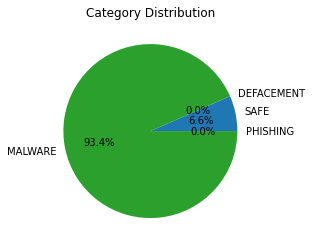

In [ ]:
import matplotlib.pyplot as plt


categories = ['SAFE', 'DEFACEMENT', 'MALWARE', 'PHISHING']
counts = [category_counts_df[col].sum() for col in category_counts_df]


plt.pie(counts, labels=categories, autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()

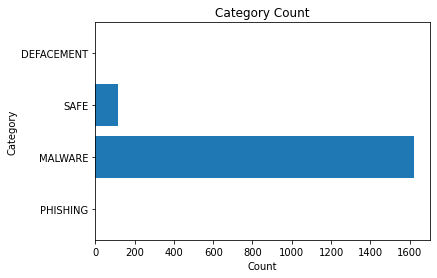

In [ ]:
phishing_count = df2['PHISHING_count'].sum()
malware_count = df2['MALWARE_count'].sum()
safe_count = df2['SAFE_count'].sum()
defacement_count = df2['DEFACEMENT_count'].sum()


labels = ['PHISHING', 'MALWARE', 'SAFE', 'DEFACEMENT']
values = [phishing_count, malware_count, safe_count, defacement_count]


fig, ax = plt.subplots()
ax.barh(labels, values)


ax.set_title('Category Count')
ax.set_xlabel('Count')
ax.set_ylabel('Category')


plt.show()

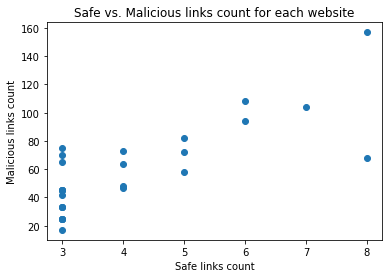

In [ ]:
# Select relevant columns from the dataframe
df_scatter = df2[['SAFE_count', 'MALWARE_count']].dropna()

# Create scatterplot
plt.scatter(df_scatter['SAFE_count'], df_scatter['MALWARE_count'])
plt.xlabel('Safe links count')
plt.ylabel('Malicious links count')
plt.title('Safe vs. Malicious links count for each website')
plt.show()